# Задача 12

Предсказать сорт винограда из которого сделано вино, используя [результаты химических анализов](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data) ([описание](http://archive.ics.uci.edu/ml/datasets/Wine) данных), c помощью KNN - метода k ближайших соседей с тремя различными метриками. Построить график зависимости величины ошибки от числа соседей k. 

In [1]:
%matplotlib inline

import scipy as sp

from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24

In [2]:
# I don't now why, but this have to be in separate cell.
plt.rcParams['figure.figsize'] = 12, 8

In [3]:
X, y = load_wine(return_X_y=True)

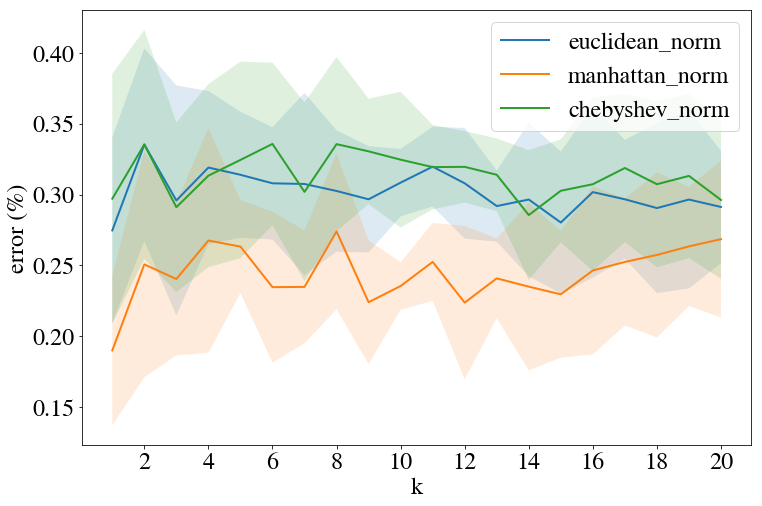

In [4]:
ks = range(1, 21)

for metric in ('euclidean', 'manhattan', 'chebyshev'):
    means, std_deviations = [], []
    
    for k in ks:
        classifier = KNeighborsClassifier(n_neighbors=k, metric=metric)
        scores = cross_val_score(classifier, X, y, cv=5)
        
        means.append(scores.mean())
        std_deviations.append(scores.std())
    
    # plot a chart
    errors = 1 - sp.array(means)
    std_deviations = sp.array(std_deviations)
    
    plt.plot(ks, errors, label=metric + '_norm')
    plt.fill_between(ks, errors - std_deviations, errors + std_deviations, alpha=0.15)
    
plt.xticks(ks[1::2])
plt.xlabel('k')
plt.ylabel('error (%)')
plt.legend(loc='upper right')
plt.show()

Сравнивались следующие метрики:
- сумма модулей (manhattan)
- евклидова норма (euclidean)
- максимум модулей (chebyshev)

Сравнивались количество ближайших соседей от 1 до 20 (верхняя граница 20 в силу малого количества данных).

## Вывод
Cумма модулей в качестве метркии оказалась самым удачным выбором.
